# Case Map

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import contextily as ctx

import andes
import ams

In [2]:
%matplotlib inline

In [3]:
!ams misc --version

Python   3.10.0
ams      1.0.7.post25+g357641af
andes    1.9.3.post6+g518882a0
numpy    1.23.5
cvxpy    1.5.3
solvers  CLARABEL, ECOS, ECOS_BB,
         GUROBI, MOSEK, OSQP, PIQP,
         SCIP, SCIPY, SCS


In [4]:
andes.config_logger(stream_level=20)
ams.config_logger(stream_level=20)

In [5]:
sp = ams.load("./ACTIVSg200/IL200_opf.xlsx",
              setup=True, no_output=True,)

Working directory: "/Users/jinningwang/work/turbinegov"
Parsing input file "./ACTIVSg200/IL200_opf.xlsx"...
Input file parsed in 0.1214 seconds.
Zero Line parameters detected, adjusted to default values: rate_b, rate_c, amax, amin.
System set up in 0.0031 seconds.


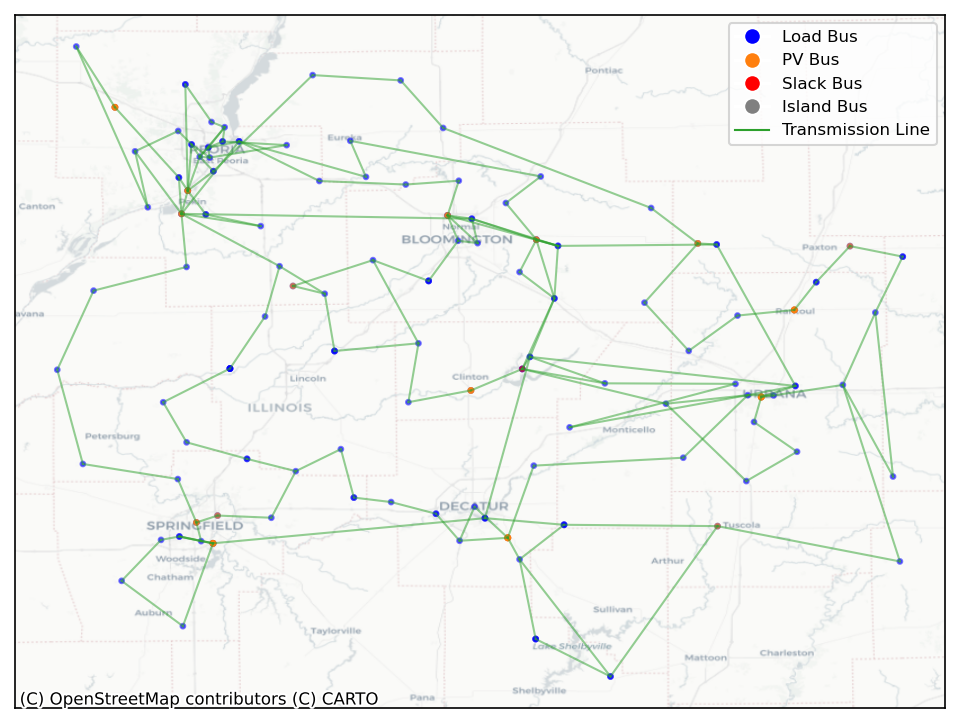

In [6]:
plt.style.use('default')

# Create a scatter plot
fig, ax = plt.subplots(1, 1,
                      figsize=(8, 6), dpi=150)

hv_bus_uid = np.where(sp.Bus.Vn.v >= 0)[0]
hv_bus = [sp.Bus.idx.v[i] for i in hv_bus_uid]

xcoord = sp.Bus.get(src='xcoord', attr='v', idx=hv_bus)
ycoord = sp.Bus.get(src='ycoord', attr='v', idx=hv_bus)

# Plot lines connecting from-bus to to-bus first
for i in range(sp.Line.n):
    bus1 = sp.Line.bus1.v[i]
    bus2 = sp.Line.bus2.v[i]
    if bus1 in hv_bus and bus2 in hv_bus:
        x = sp.Bus.get(src='xcoord', attr='v', idx=[bus1, bus2])
        y = sp.Bus.get(src='ycoord', attr='v', idx=[bus1, bus2])
        ax.plot(x, y, color='tab:green', linewidth=1.0, alpha=0.5)

# Map bus types to colors
bus_colors = ['blue' if bus_type == 1 else
              'tab:orange' if bus_type == 2 else
              'red' if bus_type == 3 else
              'green' for bus_type in sp.Bus.get(src='type', attr='v', idx=hv_bus)]

# Plot buses with colors based on their type
ax.scatter(xcoord, ycoord,
           c=bus_colors, marker='o', label='Buses',
           alpha=0.5, s=5)  # Adjust the marker size using the 's' parameter

# Add legend for bus types
legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor='blue', markersize=8, label='Load Bus'),
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor='tab:orange', markersize=8, label='PV Bus'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
           markersize=8, label='Slack Bus'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
           markersize=8, label='Island Bus'),
    Line2D([0], [0], color='tab:green', lw=1, label='Transmission Line')
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Add a base map layer
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.savefig('fig_case.pdf', dpi=200, bbox_inches='tight')